supp figure 1A

Highest Acc: 0.9781447304516756


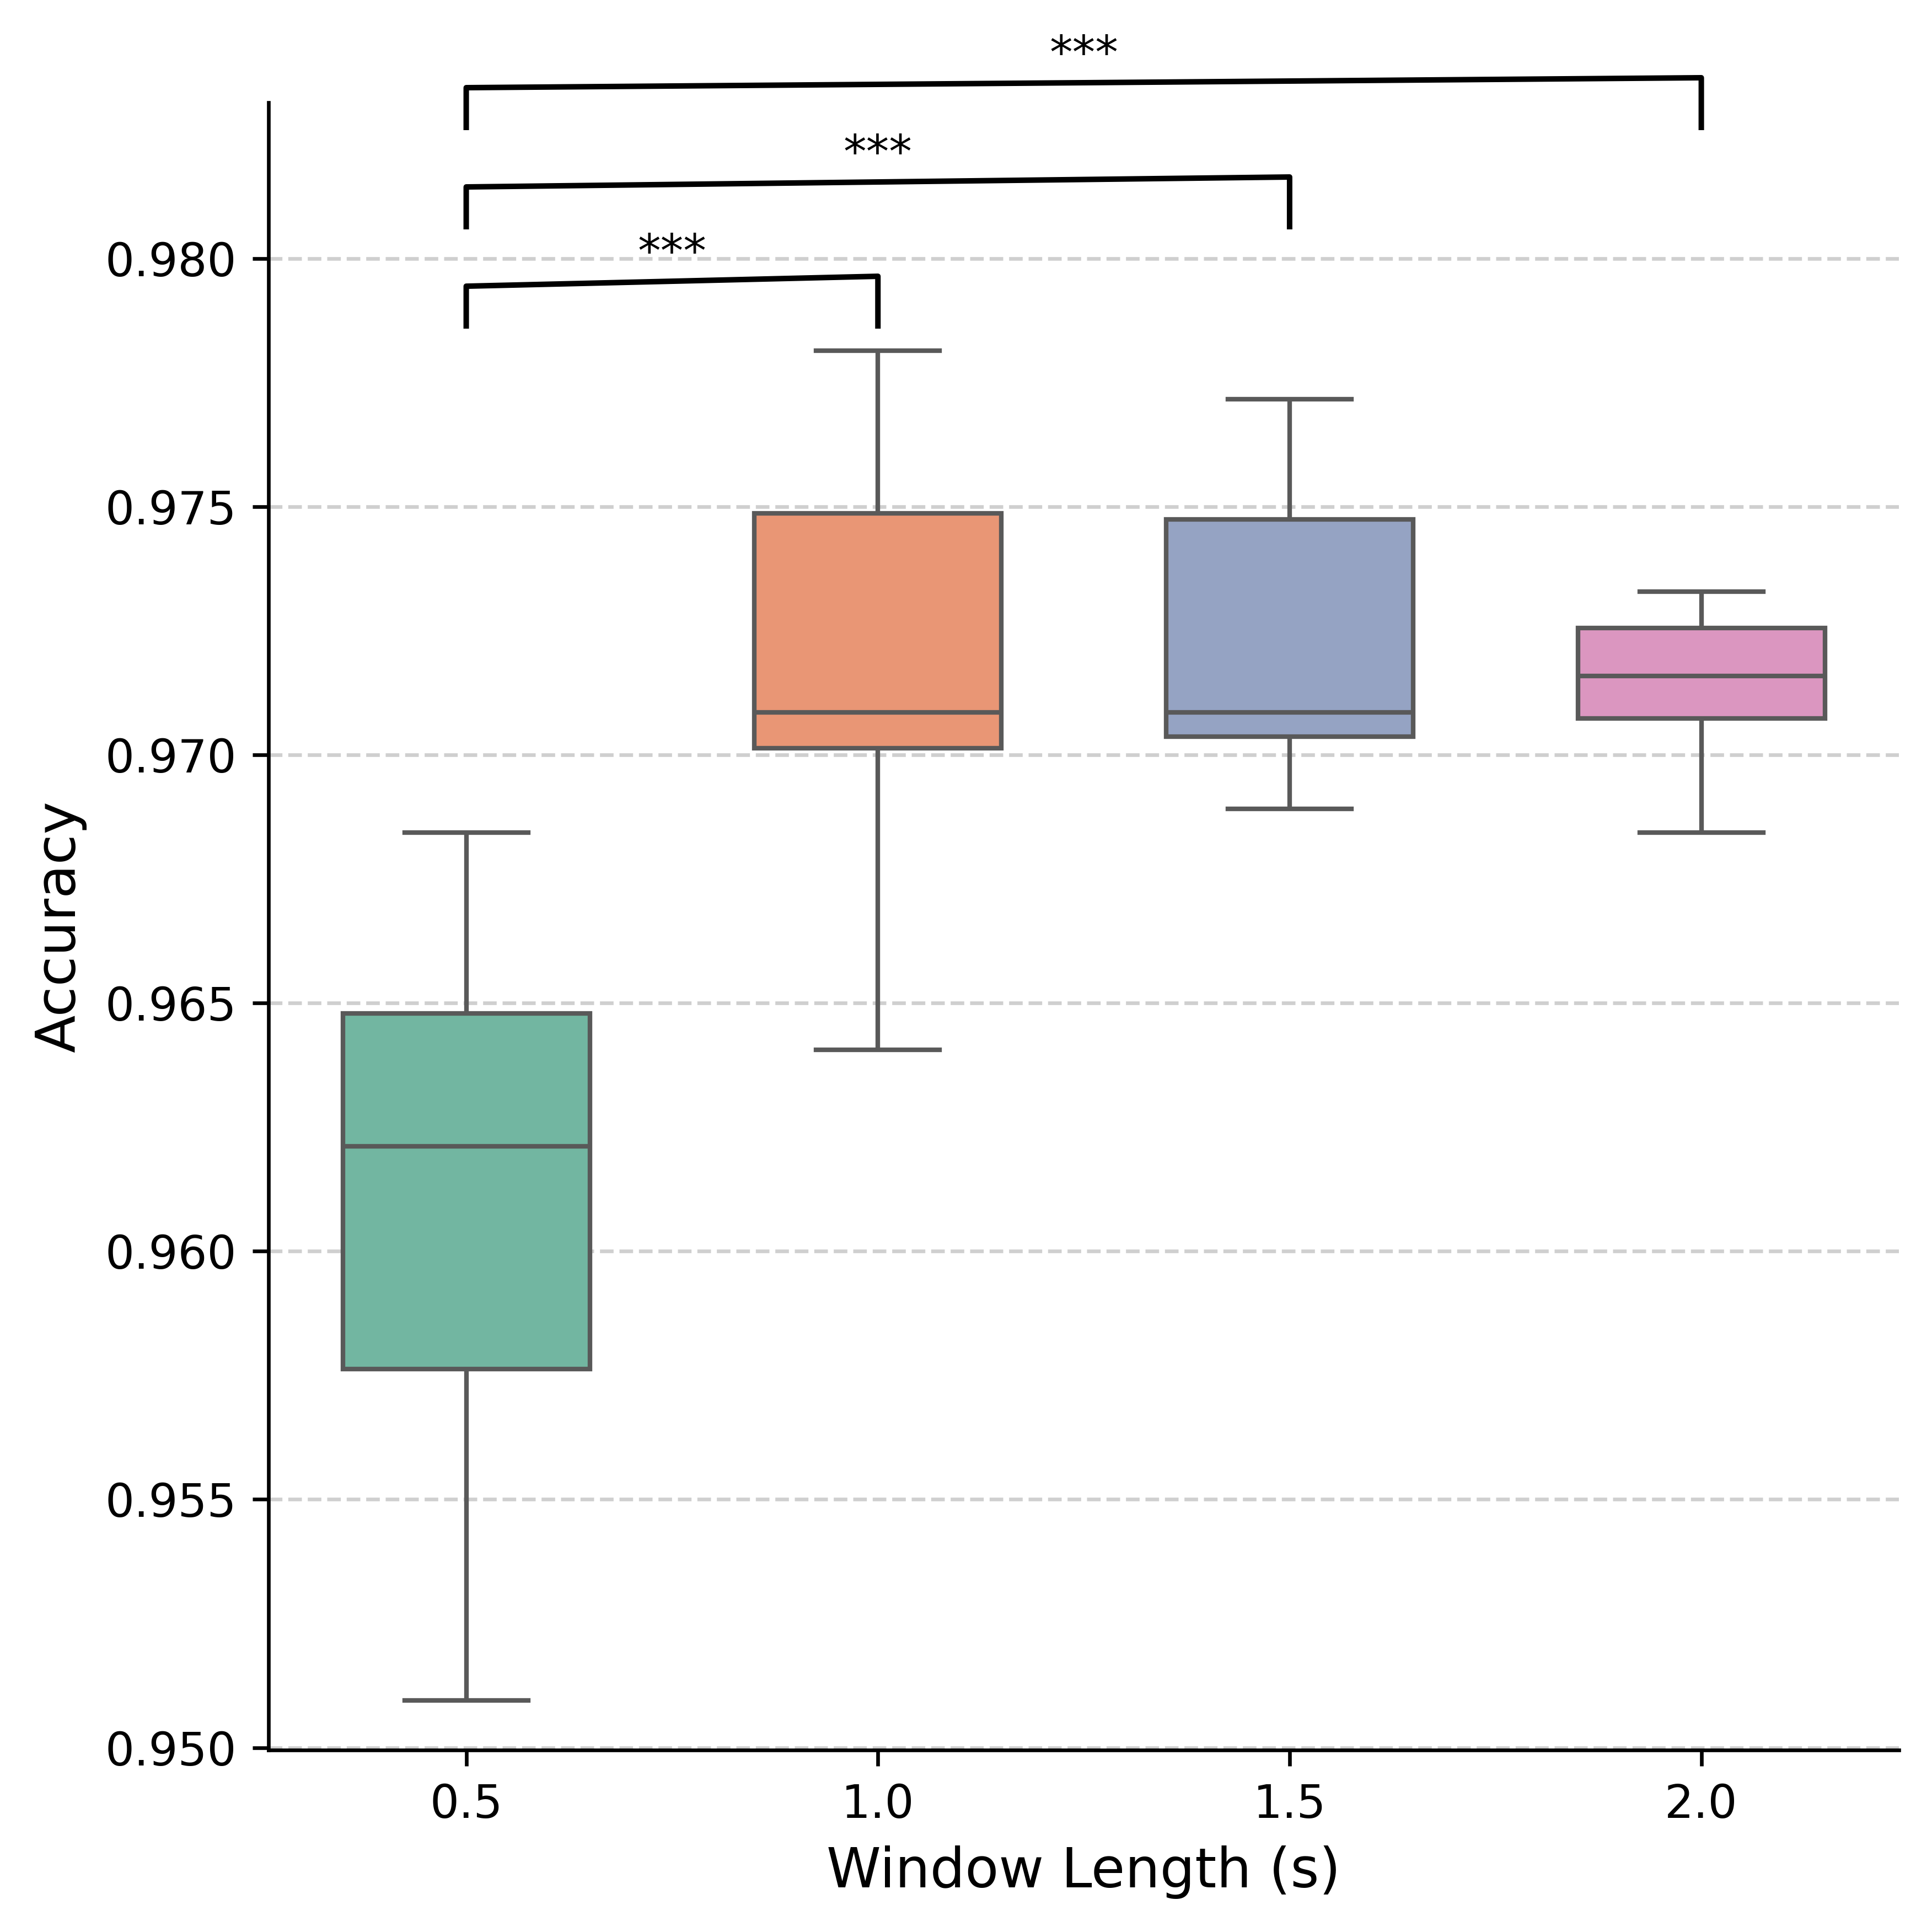

In [ ]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
import numpy as np

load_path = '../dataset/window_lengths_across_seeds/acc_list.pkl'
with open(load_path, 'rb') as f:
    acc_list = pickle.load(f)

plt.rcParams.update({
    'font.family': 'DejaVu Sans',
    'font.size': 12,
    'axes.labelsize': 12,
    'axes.titlesize': 14,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
    'figure.dpi': 300,
    'figure.autolayout': True,
    'savefig.format': 'tiff',
    'savefig.dpi': 300
    })

window_labels = ['0.5', '1.0', '1.5', '2.0']  
flat_acc = []
windows = []
for idx, acc_folds in enumerate(acc_list):
    flat_acc.extend(acc_folds)
    windows.extend([window_labels[idx]] * len(acc_folds))

df = pd.DataFrame({'Accuracy': flat_acc, 'Window Length (s)': windows})

fig, ax = plt.subplots(figsize=(6, 6))  
box = sns.boxplot(x='Window Length (s)', 
                  y='Accuracy', 
                  hue='Window Length (s)', 
                  data=df, 
                  palette='Set2', 
                  width=0.6, 
                  linewidth=1, 
                  showfliers=False, 
                  ax=ax)

# # 添加数据点分布
# sns.stripplot(x='Window Length (s)', y='Accuracy', data=df, color='black', size=3, alpha=0.4, jitter=0.1, ax=ax)

ax.set_ylim(df.Accuracy.min() - 0.001, df.Accuracy.max() + 0.005)
ax.yaxis.grid(True, linestyle='--', alpha=0.6)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

pairs = [(i, j) for i in range(4) for j in range(i+1, 4)]
y_offset = df.Accuracy.max() + 0.0005
print(f"Highest Acc: {df.Accuracy.max()}")
line_params = {'linewidth': 1.2, 'color': 'black', 'clip_on': False}

for pair in pairs:
    data1 = df[df['Window Length (s)'] == window_labels[pair[0]]].Accuracy
    data2 = df[df['Window Length (s)'] == window_labels[pair[1]]].Accuracy
    _, p_value = ttest_ind(data1, data2, equal_var=False)
        
    if p_value < 0.05/len(pairs):
        star = '*' * min(3, int(-np.log10(p_value)) - 1)
            
        ax.plot([pair[0], pair[0], pair[1], pair[1]], [y_offset, y_offset+0.0008, y_offset+0.001, y_offset], **line_params)    
        ax.text((pair[0]+pair[1])/2, y_offset + 0.001, star, ha='center', va='bottom', fontsize=10)
        y_offset += 0.002  

# plt.savefig('figure/supp_1A.tiff', bbox_inches='tight', pil_kwargs={'compression': 'tiff_lzw'})
plt.show()
plt.close()

supp figure 1B-E

/home/zhuyan/miniconda3/envs/POD/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 64, using nperseg = 64
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


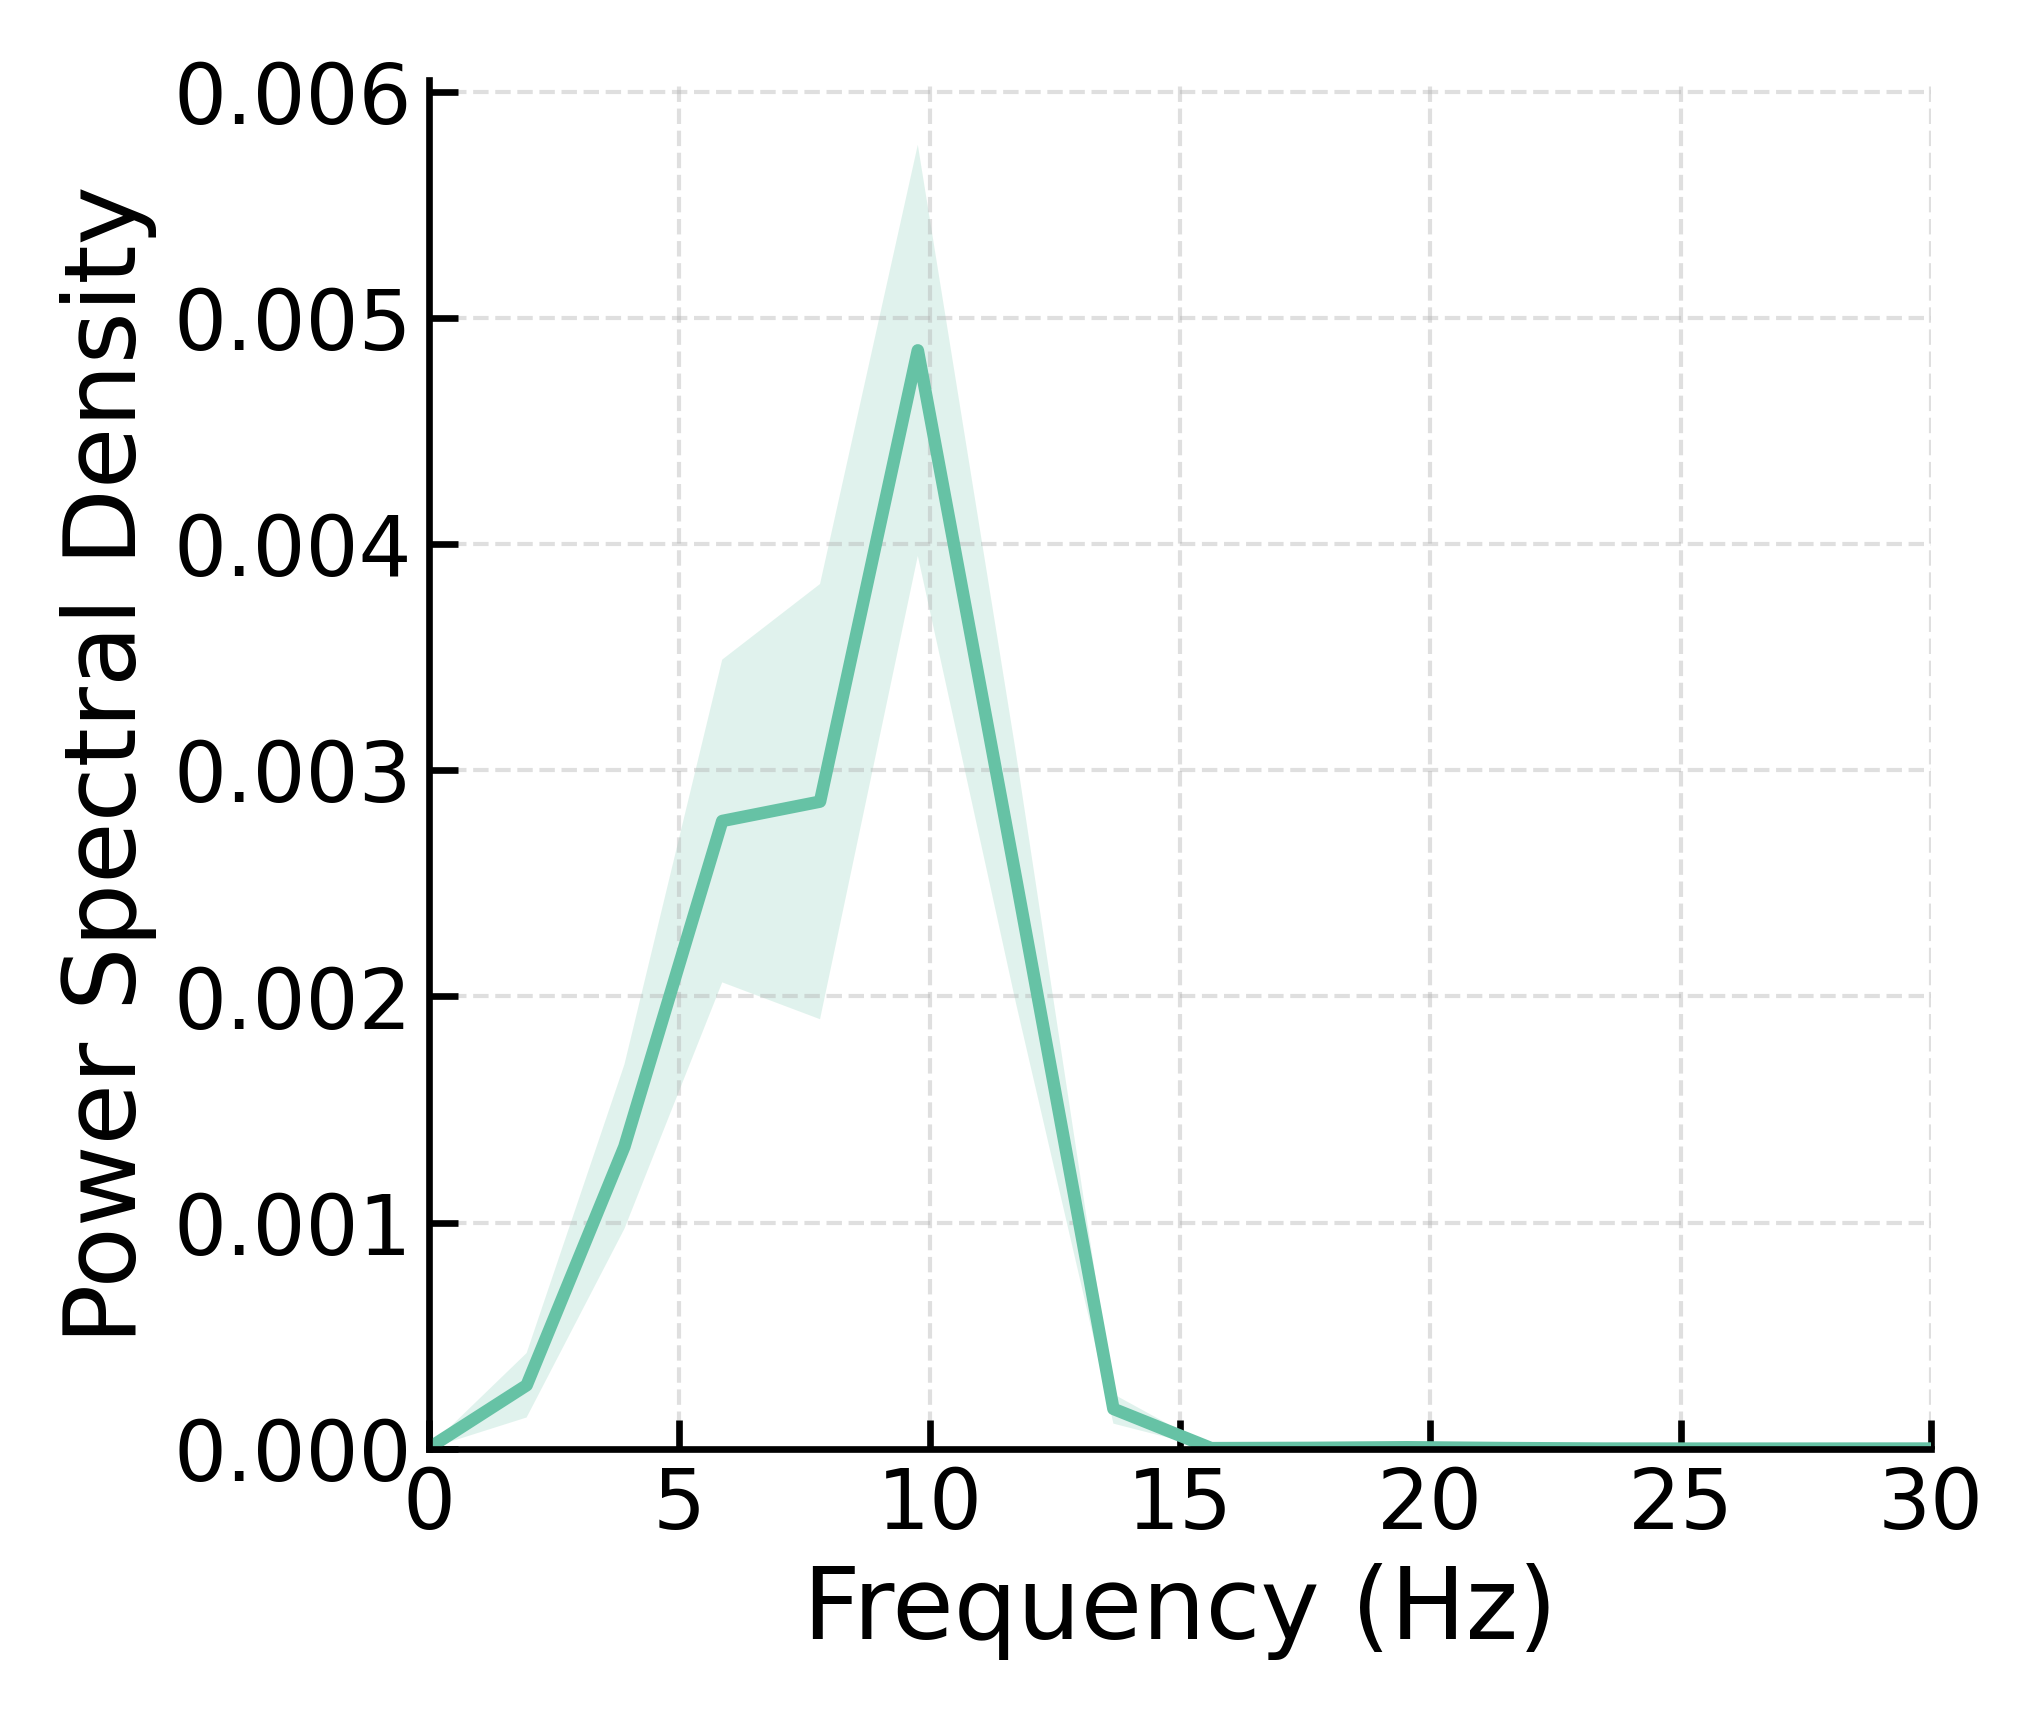

/home/zhuyan/miniconda3/envs/POD/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 125, using nperseg = 125
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


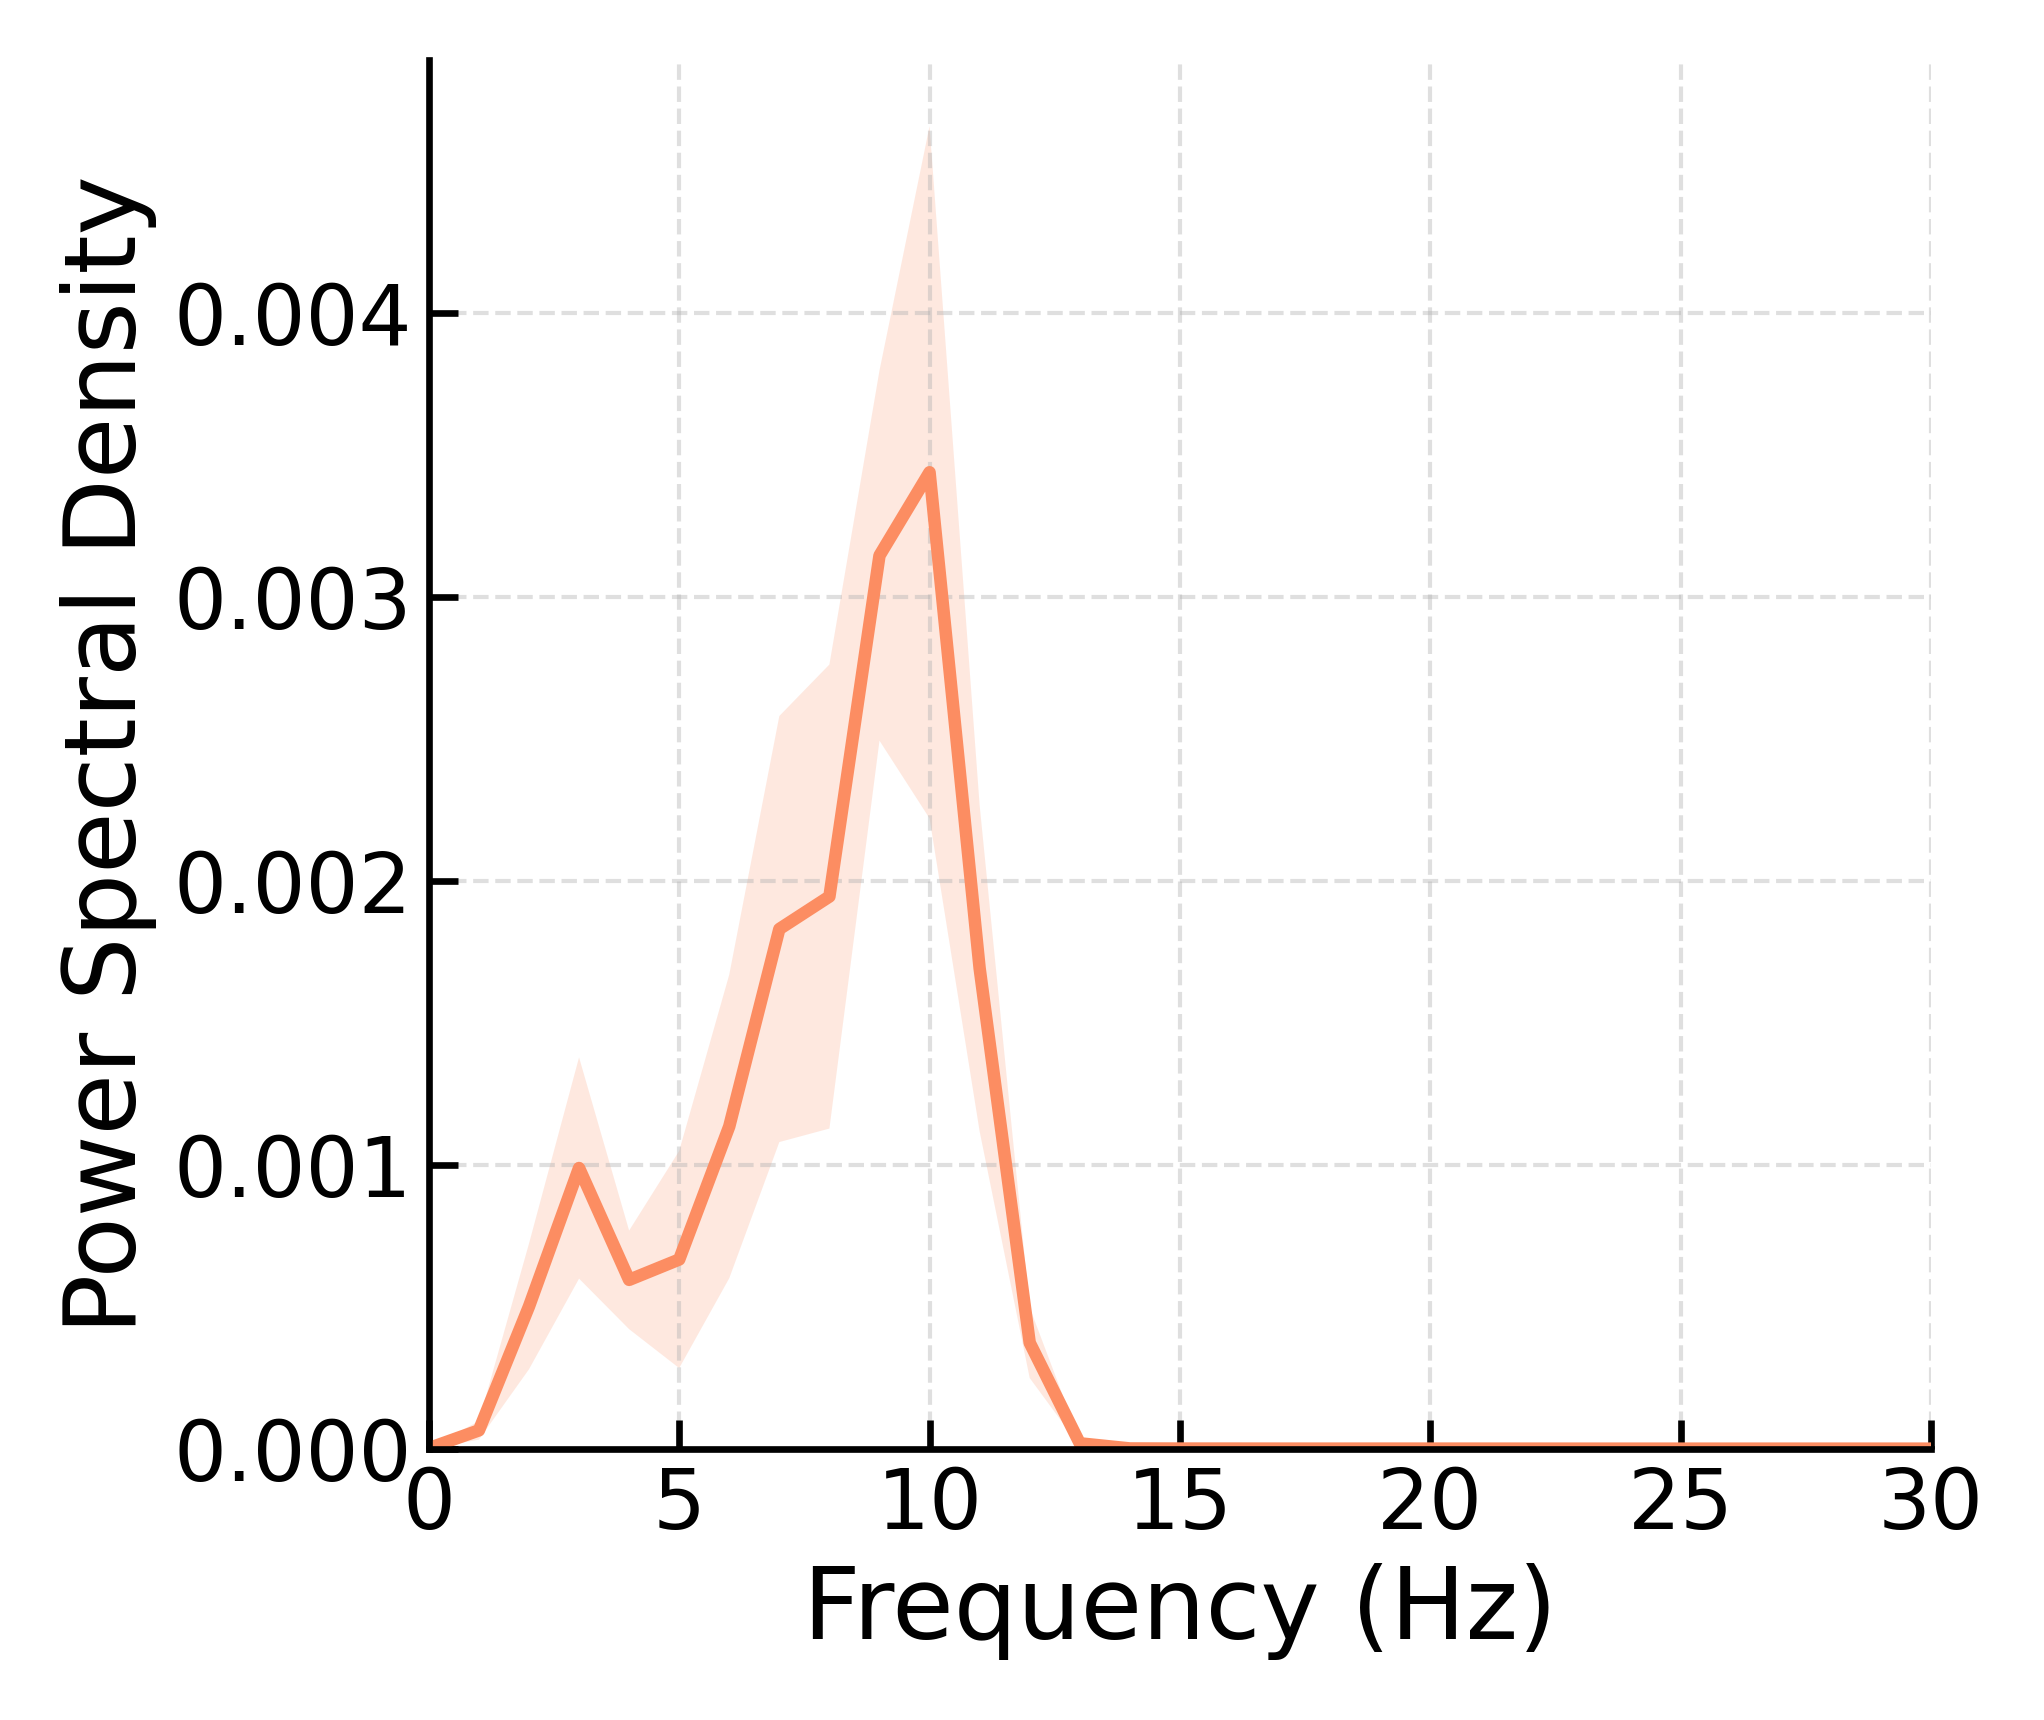

/home/zhuyan/miniconda3/envs/POD/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 188, using nperseg = 188
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


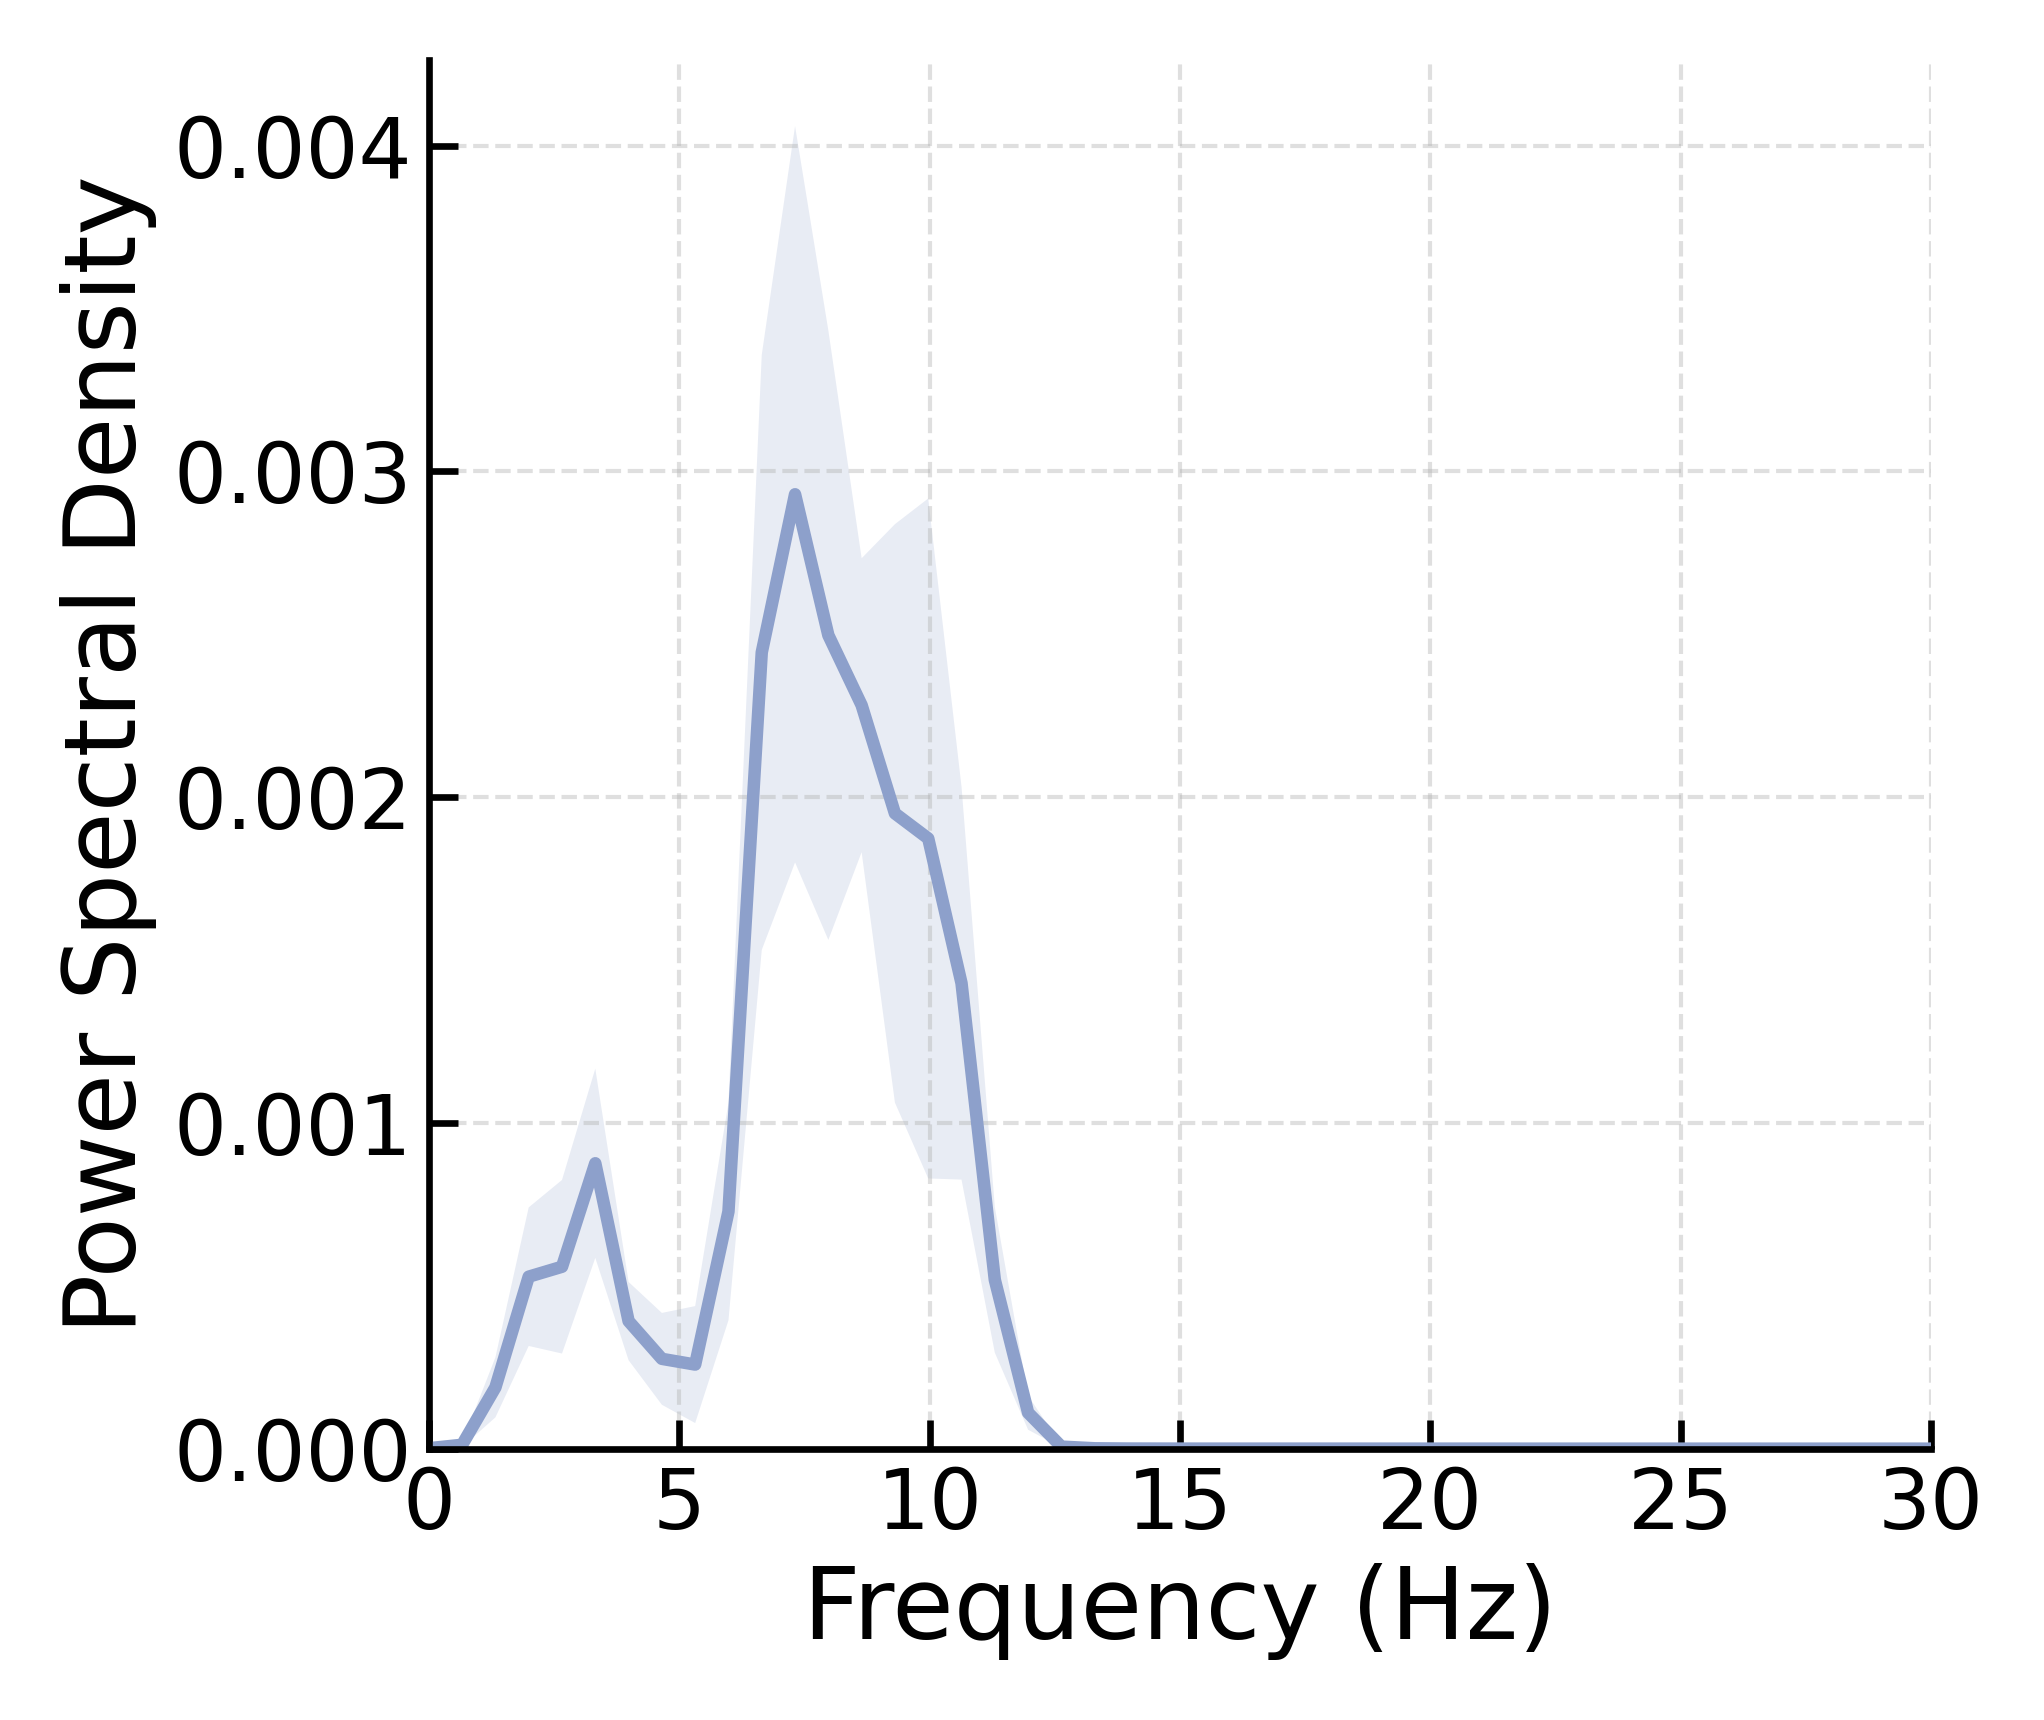

/home/zhuyan/miniconda3/envs/POD/lib/python3.12/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 250, using nperseg = 250
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


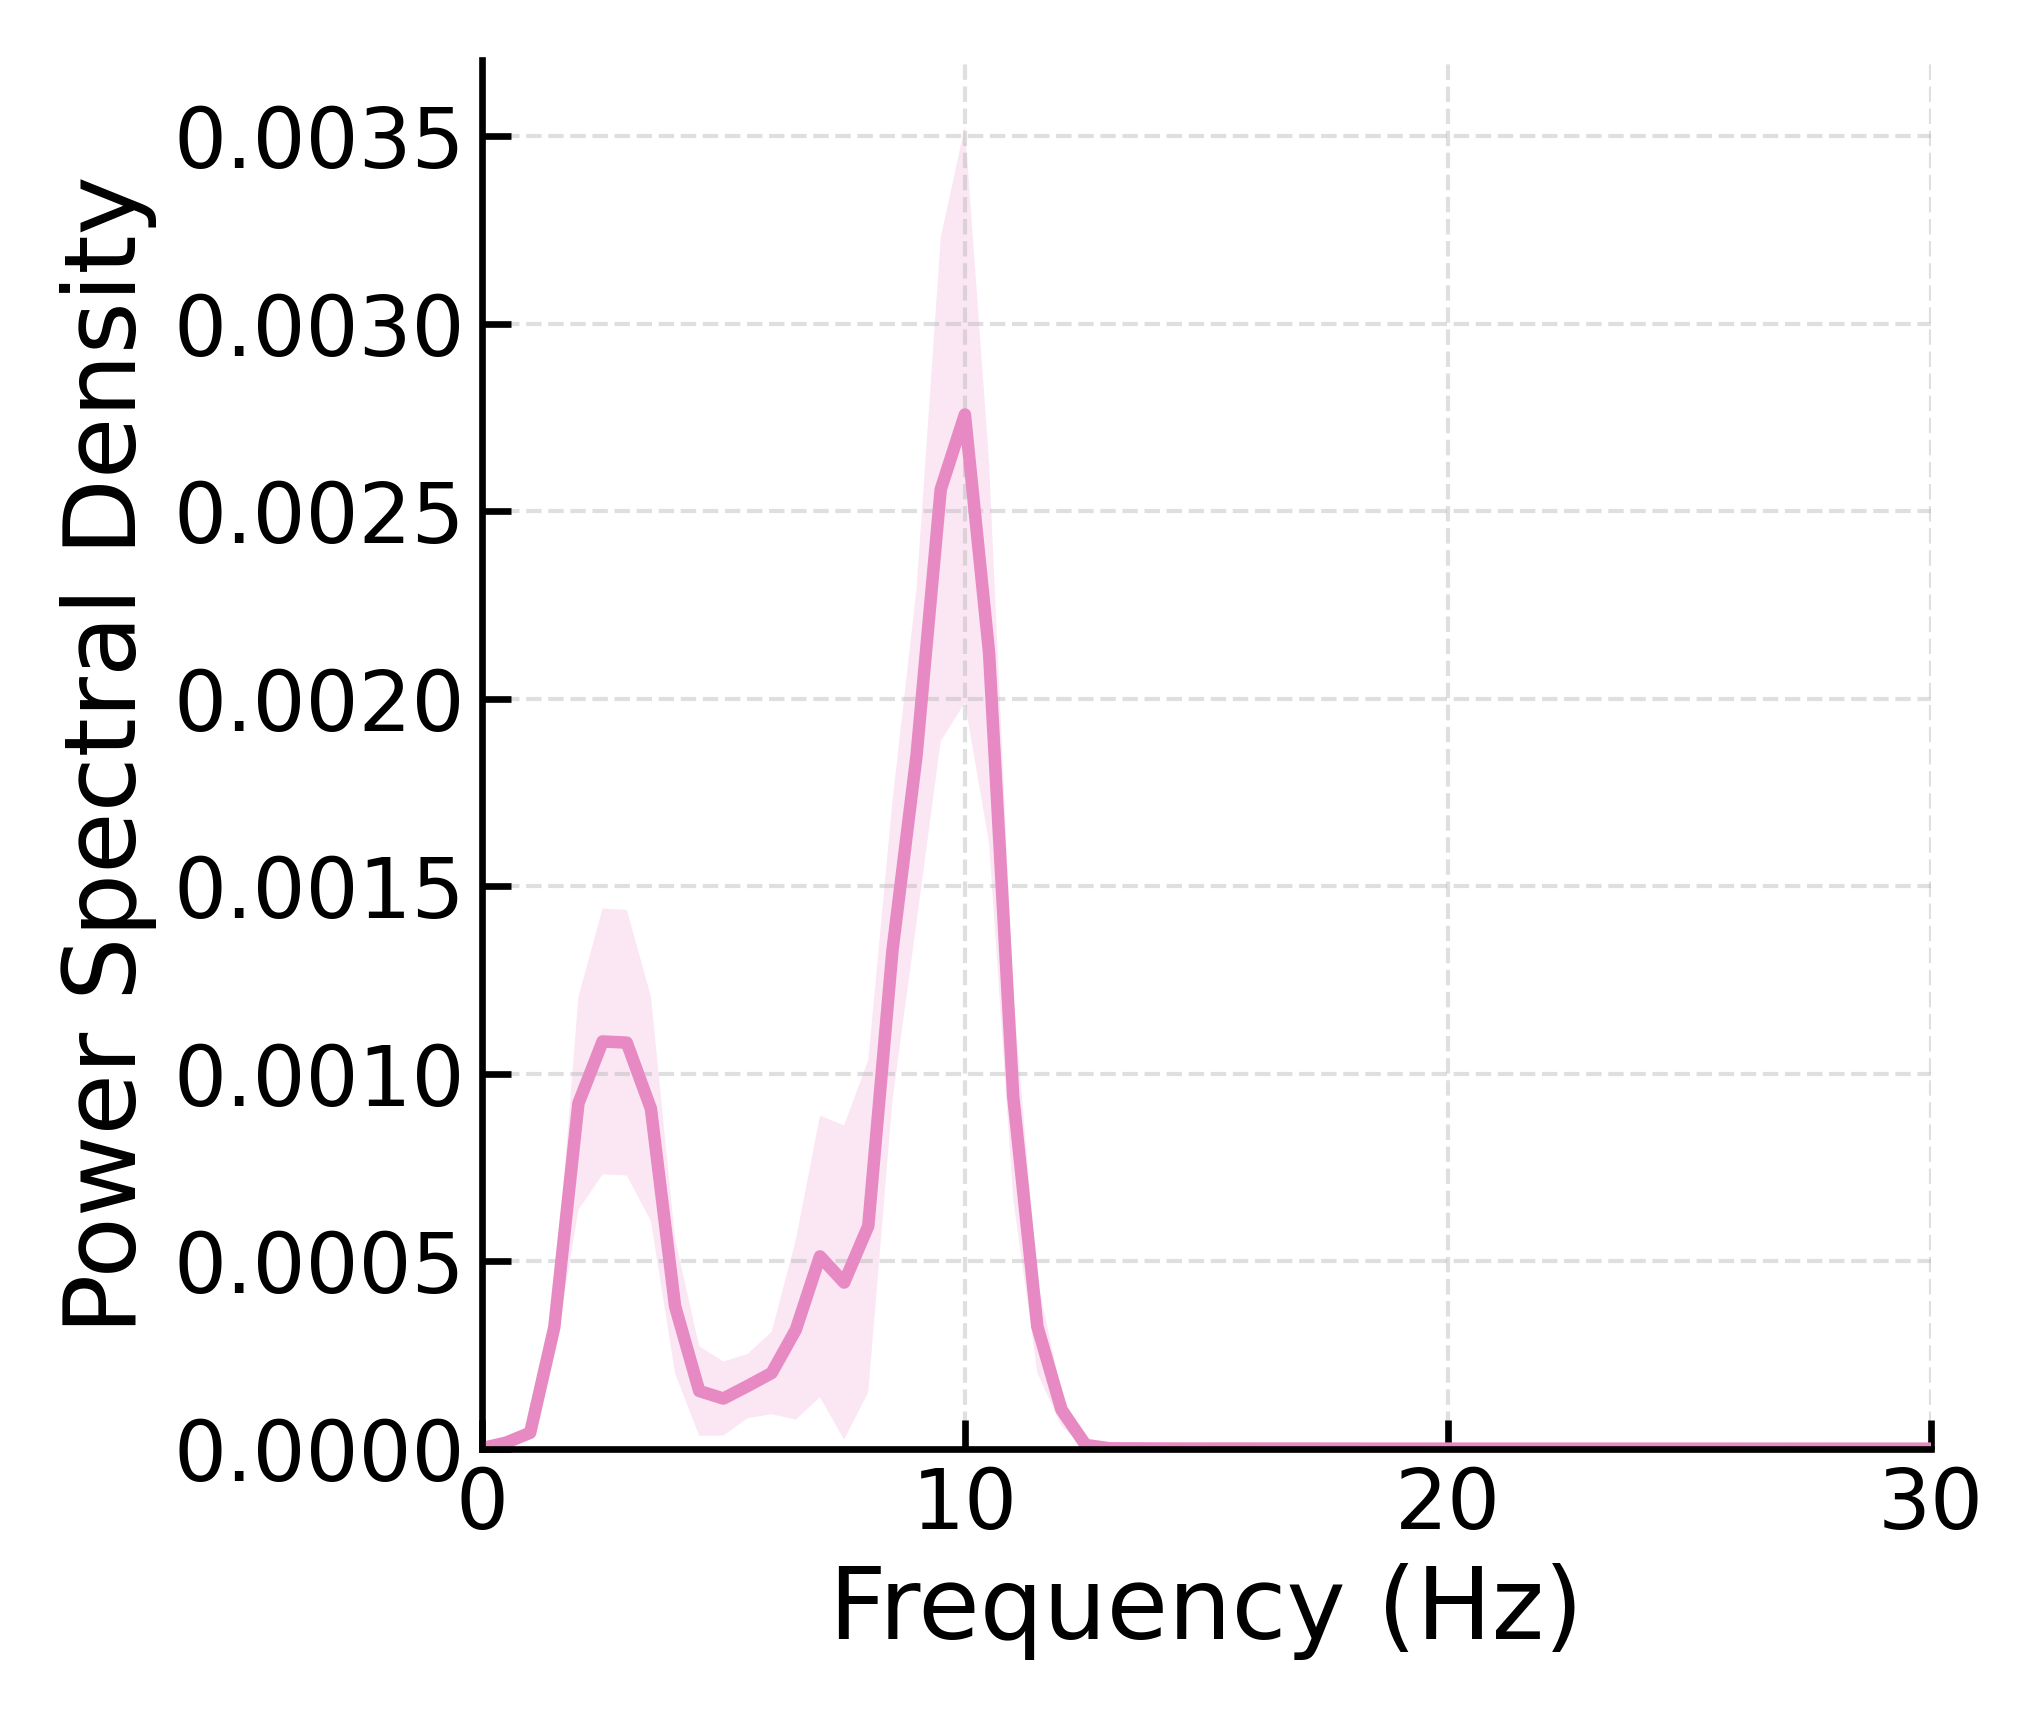

In [ ]:
import pickle
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns
from scipy.signal import welch

load_path = '../dataset/window_lengths_across_seeds/temporal_list.pkl'
with open(load_path, 'rb') as f:
    temporal_list = pickle.load(f)

plt.rcParams.update({
    'font.family': 'DejaVu Sans',
    'font.size': 12,
    'axes.labelsize': 12,
    'axes.titlesize': 14,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
    'figure.dpi': 300,
    'figure.autolayout': True,
    'savefig.format': 'tiff',
    'savefig.dpi': 300
    })
palette = sns.color_palette("Set2", n_colors=len(temporal_list))

fs=125
nperseg=125
z_value=1.96

for idx, temporal_max_weights_list in enumerate(temporal_list):
    psd_list = []
    for temporal_max_weights in temporal_max_weights_list:
        frequencies, psd = welch(temporal_max_weights, fs=fs)
        psd_list.append(psd)
    psd_list = np.array(psd_list)

    mean_psd = np.mean(psd_list, axis=0)
    se_psd = np.std(psd_list, axis=0) / np.sqrt(psd_list.shape[0])

    lower_bound = mean_psd - z_value * se_psd
    upper_bound = mean_psd + z_value * se_psd

    fig, ax = plt.subplots(figsize=(3.54, 3)) 
    ax.plot(frequencies, mean_psd, color=palette[idx], lw=1.5, label=f'Set {idx+1}')
    ax.fill_between(frequencies, lower_bound, upper_bound, color=palette[idx], alpha=0.2,  linewidth=0)  
    
    ax.set_xlim(0, 30)
    ax.set_ylim(bottom=0)  
    ax.set_xlabel("Frequency (Hz)", labelpad=2)
    ax.set_ylabel("Power Spectral Density", labelpad=2)
    ax.tick_params(which='both', direction='in', width=0.8, pad=2)  
    ax.grid(True, alpha=0.4, linestyle='--', linewidth=0.5)
    sns.despine(ax=ax, top=True, right=True)
    
    plt.tight_layout(pad=1) 
    plt.savefig(f"figure/supp_1_{idx+1}.tiff", bbox_inches='tight', pil_kwargs={'compression': 'tiff_lzw'})
    plt.show()
    plt.close()